# Reading results with fibers

Load main libraries, set paths and adjust plotting theme (optional)

In [1]:
from pathlib import Path
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('static')
pv.global_theme.background = 'white'
pv.global_theme.color = "beige"
pv.global_theme.show_edges = True
pv.global_theme.window_size = [800, 400]

STATICS_DIR = Path("../../../../_static")
HEXBEAM_MULTIBLOCK_FILEPATH = STATICS_DIR / "hexbeam_multiblock_discrete_case_1.vtm"
INPUT_FILEPATH = STATICS_DIR / "sample_fibers_case_1_v25.feb"
RESULTS_FILEPATH = STATICS_DIR / "sample_fibers_case_1_v25.xplt"

## Reading XPLT

In [2]:
from febio_python import Xplt

xplt = Xplt(RESULTS_FILEPATH)
xplt

Xplt object [1271491914672]:
=== xplt_mesh: ===
-Nodes:
--->None: (1828, 3)
-Elements:
--->None: (1296, 8)
=== States: ===
-Nodes:
--->displacement: (17, 1828, 3)
-Elements:
--->Lagrange strain: (17, 1296, 6)
--->stress: (17, 1296, 6)
--->fiber vector: (17, 1296, 3)
-Surfaces:

In [3]:
node_state_datanames = [nodal_data.name for nodal_data in xplt.states.nodes]
elem_state_datanames = [elem_data.name for elem_data in xplt.states.elements]
timesteps = xplt.states.timesteps

print(f"Node state data names: {node_state_datanames}")
print(f"Element state data names: {elem_state_datanames}")
print(f"Number of timesteps: {len(timesteps)} | First timestep: {timesteps[0]} | Last timestep: {timesteps[-1]}")

Node state data names: ['displacement']
Element state data names: ['Lagrange strain', 'stress', 'fiber vector']
Number of timesteps: 17 | First timestep: 0.0 | Last timestep: 1.0


In [4]:
el_data_0 = xplt.states.elements[0]
print(f"Element data name: {el_data_0.name}")
print(f"Element data shape: {el_data_0.data.shape}")
print(f"Last state min and max values: {el_data_0.data[-1].min()} | {el_data_0.data[-1].max()}")

Element data name: Lagrange strain
Element data shape: (17, 1296, 6)
Last state min and max values: -0.18092681467533112 | 0.18889158964157104


In [5]:
el_data_1 = xplt.states.elements[1]
print(f"Element data name: {el_data_1.name}")
print(f"Element data shape: {el_data_1.data.shape}")
print(f"Last state min and max values: {el_data_1.data[-1].min()} | {el_data_1.data[-1].max()}")

Element data name: stress
Element data shape: (17, 1296, 6)
Last state min and max values: -427.0033874511719 | 116.36917877197266


## Plotting results

In [6]:
from febio_python import FEBioContainer

container = FEBioContainer(feb=INPUT_FILEPATH, xplt=xplt)

In [7]:
from febio_python.utils.pyvista_utils import febio_to_pyvista

grids_list = febio_to_pyvista(container)
len(grids_list)

17

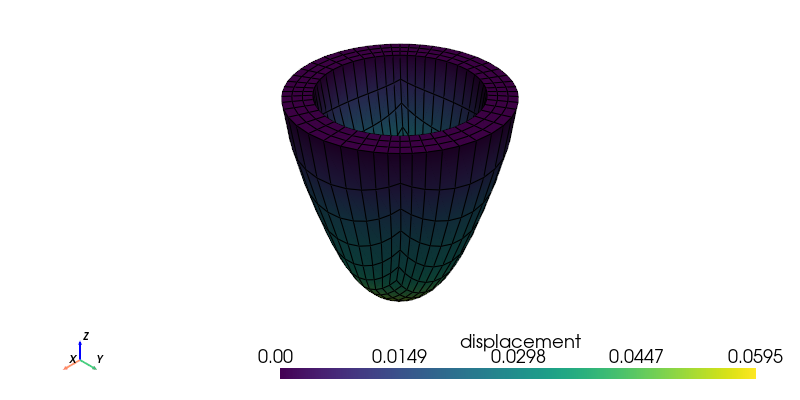

In [9]:
grids_list[-1].plot(show_edges=True, scalars="displacement")